# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box


pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data', "data 2",  
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads (1)',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [27]:
# Create a list to store geopandas data frames for reference in for loop
spatial_list = [states, places, roads]

for i in spatial_list: 
    # i represents each geo-data frame
    i.columns = i.columns.str.lower()
    print(i.columns)


Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object')
Index(['scalerank', 'natscale', 'labelrank', 'featurecla', 'name', 'namepar',
       'namealt', 'nameascii', 'adm0cap', 'capalt', 'capin', 'worldcity',
       'megacity', 'sov0name', 'sov_a3', 'adm0name', 'adm0_a3', 'adm1name',
       'iso_a2', 'note', 'latitude', 'longitude', 'pop_max', 'pop_min',
       'pop_other', 'rank_max', 'rank_min', 'meganame', 'ls_name', 'min_zoom',
       'ne_id', 'geometry'],
      dtype='object')
Index(['scalerank', 'featurecla', 'type', 'sov_a3', 'note', 'edited', 'name',
       'namealt', 'namealtt', 'routeraw', 'question', 'length_km', 'toll',
       'ne_part', 'label', 'label2', 'local', 'localtype', 'localalt',
       'labelrank', 'ignore', 'add', 'rwdb_rd_id', 'orig_fid', 'prefix',
       'uident', 'continent', 'expressway', 'level', 'min_zoom', 'min_labe

## Preparing Alaska Polygon
Let’s start by taking taking a look at our states geo-dataframe. Since this is a geospatial dataset, exploration should include at least checking the head of the dataset, plotting the data, and looking at its CRS.


In [28]:
print(f"CRS: {states.crs}")

states.head(3)

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

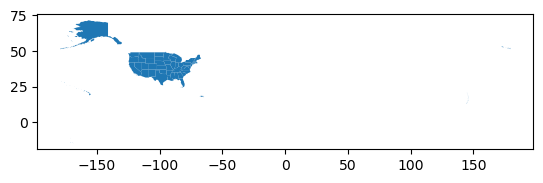

In [29]:
# Check out plot 
states.plot()

For this lesson, we are intersted in plotting data only Alaska, se let’s select this data:

In [33]:
alaska = states[states.name == "Alaska"].copy()

<Axes: >

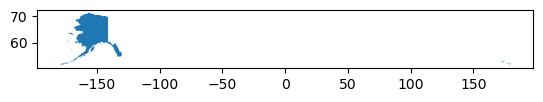

In [ ]:
# Plot the new dataset 
alaska.plot()


Notice that the way the Alaska multipolygon is plotted under the NAD83/EPSG:4269 CRS separates the islands and unnaturally elongates the map. To fix this, we will reproject the Alaska geo-dataframe to the EPSG:3338 CRS. This CRS is a projected CRS, better suited for working with data from Alaska:



In [46]:
# What is the CRS? 
alaska = alaska.to_crs("epsg:3338")

# Double check projection 
print("Was Alaska projected?",alaska.crs.is_projected)
alaska.crs

Was Alaska projected? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

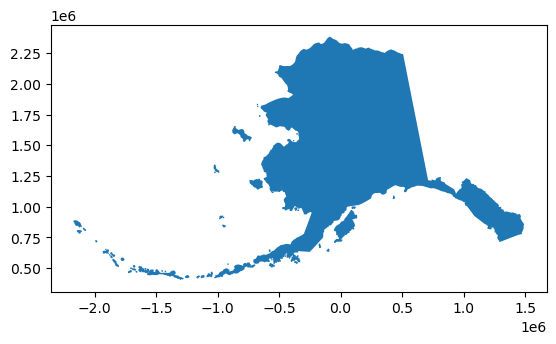

In [47]:
# What does the projected Alaska geopandas data frame look like now?
alaska.plot()

## Prepare populated areas 
Here, we need to explore the populated areas in the data:

In [50]:
print(f"CRS: {places.crs}")

places.head(3)

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


This dataset has the EPSG:4326 CRS. Remember this is the EPSG code for the WGS 84 CRS. This is not a surprise since the places data is global and EPSG:4326/WGS84 is the most widely used CRS for such data.



<Axes: >

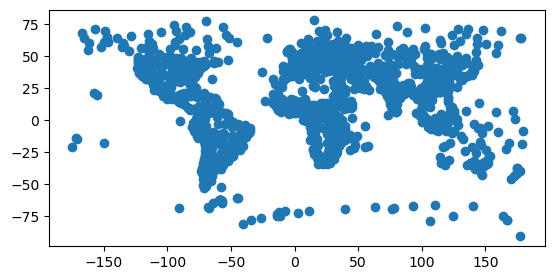

In [51]:
places.plot()

This dataset has the EPSG:4326 CRS. Remember this is the EPSG code for the WGS 84 CRS. This is not a surprise since the places data is global and EPSG:4326/WGS84 is the most widely used CRS for such data.

Let’s see what happens when we try to plot this data on top of Alaska:

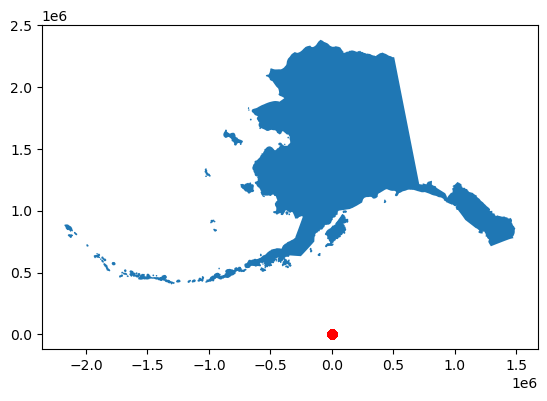

In [ ]:
# Assign ax =ax to avoid creating empty figure
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = "red")

plt.show()

### Checkin
**Recall that ALL SPATIAL OBJECTS SHOULD HAVE THE SAME CRS!!!**

Reproject the places geo-datafarme into alaska’s CRS and verify the CRSs match using assert.


In [56]:
# Reproject places to alaska CRS
places = places.to_crs(alaska.crs)

In [57]:
# Use assert to double check 
assert places.crs == alaska.crs

Let’s check that map again:

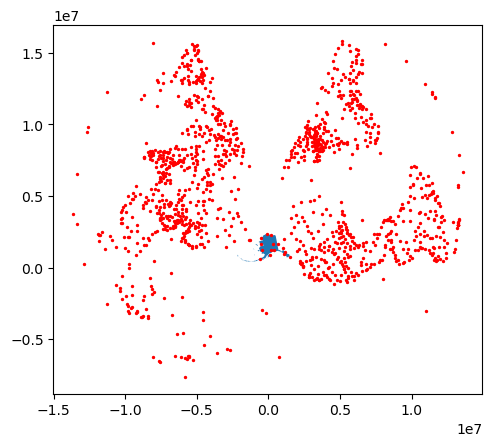

In [59]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2)

plt.show()

This is better: we can see there the Alaska poygons and some of the places points on top of it. Our next step is to select these points.



## Clipping
Clipping means using a polygon (or polygons) to only select geospatial data within them. Clipping a geopandas.GeoDataFrame is simple using the geopandas clip() function. The general syntax is:




updated_geodf = geopandas.clip(geodf, mask)




where:

- updated_geodf is the output of the method: the intersection of the geometries in geodf with mask,
- geodf is the geopandas.GeoDataFrame we want to clip,
- mask is a geopandas.GeoDataFrame with the polygon(s) we want to use for clipping. This mask must be in the same CRS as geodf!


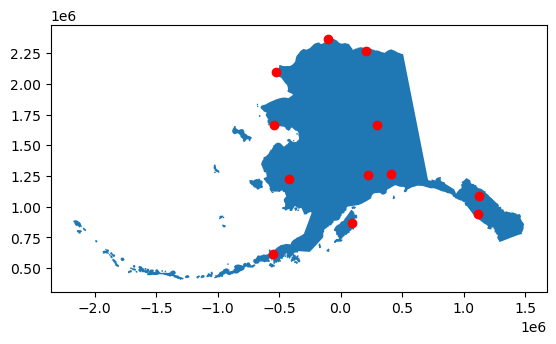

In [60]:
# Clip populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

## Prepare roads
Now, move on to the roads dataset.

In [ ]:
# Check CRs of roads and take a look at the first three rows
print(roads.crs)

roads.head(3)

EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

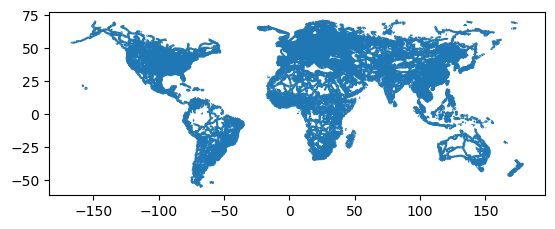

In [62]:
# Plot roads to see extent
roads.plot()

You may have already noticed that the roads data is not in the same CRS as the alaska polygons, so these geo-datasets shound’t interact until they’re in the same CRS. Before jumping right into reprojecting and clipping, we will subset the data to select only US roads:

In [63]:
usa_roads = roads[roads.sov_a3 == "USA"]

<Axes: >

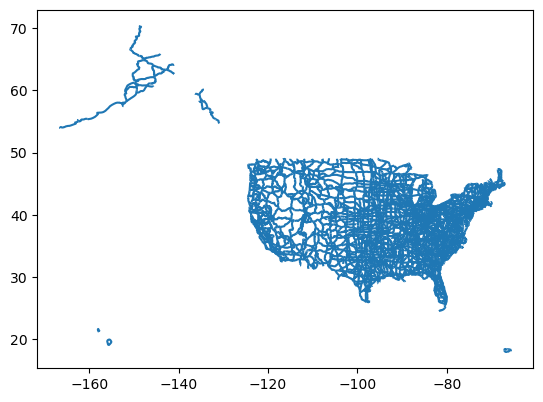

In [64]:
usa_roads.plot()

We will now compose functions to clip usa_roads using the alaska multipolygon. Notice we are using the ouput of usa_roads.to_crs(alaska.crs) directly and thus not changing the usa_roads geo-dataframe or creating new variables:



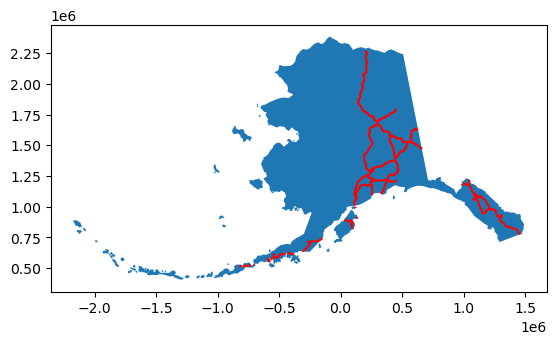

In [65]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color='red')
plt.show()

Notice how the lines break on the small islands? However, in the usa_roads there are no broken lines. This should make us suspect we are leaving data out and clipping exactly to the polygons in alaska is not quite what we want.



## Clipping with a bounding box
We will clip the usa_roads geo-dataframe with the bounding box of alaska instead of its polygons. To create a bounding box, we first use the box() function we imported from shapely.geometry. The syntax for box() is:


box(minx, miny, maxx, maxy)


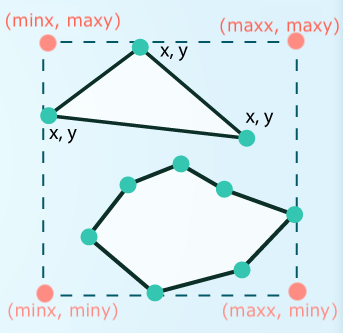

If we want to create a shapely polygon from the bounds of a geo-dataframe gdf, a more straightforward syntax is:

box(*gdf.total_bounds)


For this case: 

<class 'shapely.geometry.polygon.Polygon'>


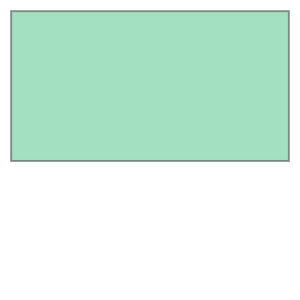

In [66]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

Notice that the bounding box is not a geodataframe, it is a stand alone, abstract polygon without any geospatial information. To interpret this polygon as something on the Earth’s surface we need to wrap it into a geo-datfrane abd assign it a CRS:



In [67]:
# Create geo-dataframe from bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox],  # Assign geometry column
                           crs = alaska.crs)  # Assign CRS
print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


In [68]:
# We can now clip the roads using Alaska’s bounding box:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

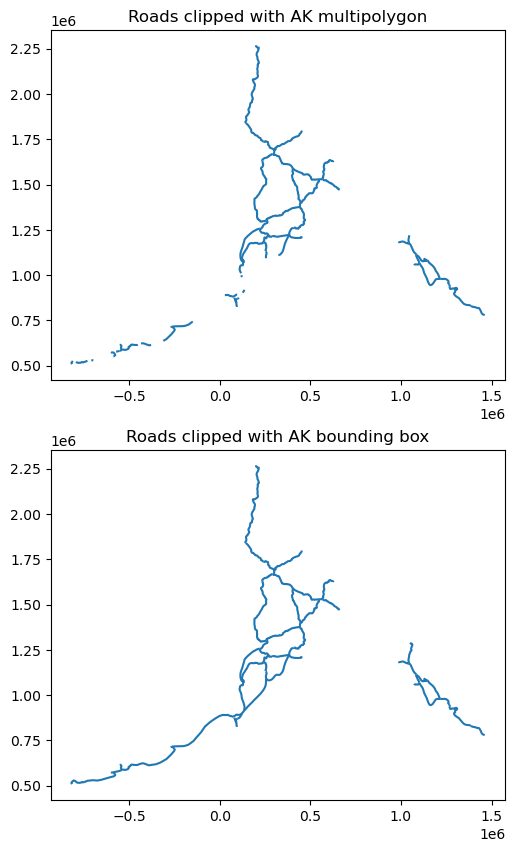

In [69]:
# Check differences between clipping methods
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

## Plot the final map 
The code is available below: 

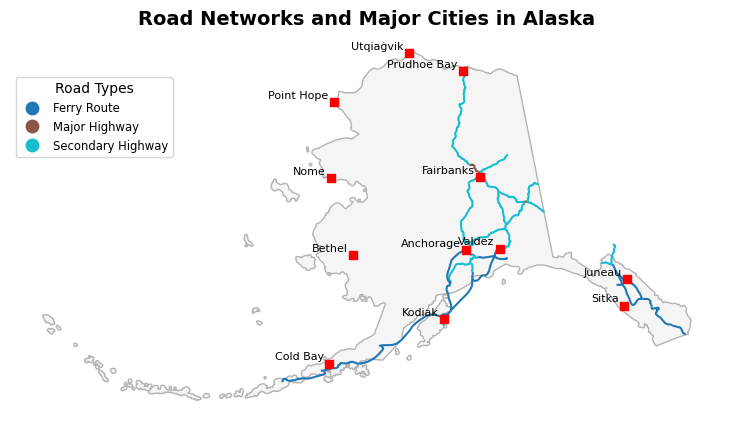

In [70]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

## Excersise 
Notice the overlaying labels for Anchorage and Valdez:



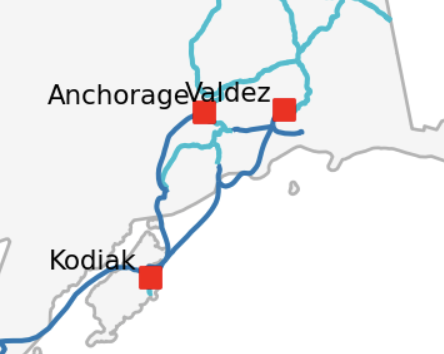

Update the map so these labels do not overlap. One way to do it is using an if when iterating over the Alaska populated places.


In [ ]:
#alaska_overlap = gpd.clip(alaska, usa_roads)
#assert alaska.crs == usa_roads.crs 

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
764,3,110,1,Populated place,Cold Bay,None,None,Cold Bay,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,55.200001,-162.715092,200,108,0.0,1,1,None,Cold Bay,5.0,1159150541,POINT (-553201.466 612732.247)
763,3,110,1,Populated place,Kodiak,None,None,Kodiak,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.789998,-152.406987,9461,6148,9122.0,5,5,None,Kodiak,5.0,1159150539,POINT (94470.762 866399.197)
765,3,110,1,Populated place,Bethel,None,None,Bethel,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,60.793303,-161.755796,6228,4653,0.0,5,4,None,Bethel,5.0,1159150543,POINT (-419821.224 1225558.907)
1080,2,200,1,Populated place,Anchorage,None,None,Anchorage,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,61.219970,-149.900215,260283,243853,0.0,10,10,None,Anchorage,3.0,1159151249,POINT (220064.767 1254886.849)
768,3,110,1,Populated place,Nome,None,None,Nome,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.506100,-165.406374,3485,2557,2450.0,4,4,None,Nome,4.0,1159150551,POINT (-544875.137 1662874.547)
771,3,110,1,Populated place,Fairbanks,None,None,Fairbanks,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.836984,-147.710659,56993,30224,0.0,8,7,None,Fairbanks,4.0,1159150557,POINT (297978.605 1666997.434)
766,3,110,1,Populated place,Point Hope,None,None,Point Hope,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,68.347726,-166.808020,461,461,0.0,2,2,None,Point Hope,5.0,1159150547,POINT (-529220.980 2094066.281)
772,3,110,1,Populated place,Prudhoe Bay,None,None,Prudhoe Bay,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,70.292181,-148.669360,2500,2174,0.0,4,4,None,Prudhoe Bay,3.7,1159150559,POINT (204235.567 2265057.193)
767,3,110,1,Populated place,Utqiaġvik,Barrow,None,Utqiaġvik,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,71.290570,-156.788580,4336,2488,1275.0,4,4,None,Barrow,5.0,1159150549,POINT (-102347.343 2368024.539)
215,4,50,1,Populated place,Sitka,None,None,Sitka,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.060398,-135.327549,8931,7289,0.0,5,5,None,Sitka,5.1,1159149319,POINT (1115512.589 941665.222)


In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if() # is.overlap or touching?
    ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()